## Tree-based Methods in Machine Learning

**Machine Learning Module in Python**

**&copy; Kaixin Wang**, Winter 2020

## Data Preprocessing

### Libraries Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# handling warning messages:
import warnings
warnings.filterwarnings('ignore')

### Data Import

In [3]:
# read in the csv file
train = pd.read_csv("football_train.csv", index_col = 0)

In [4]:
# check if the file has been correctly read in
train.head()

,Yards,OffensivePlays,TurnOversLost,FumblesLost,FirstDowns,PassesCompleted,PassesAttempted,YardsGainedPassing,InterceptionsThrown,RushingAttempts,...,OppPassesAttempted,OppYardsGainedPassing,OppInterceptionsThrown,OppRushingAttempts,OppYardsGainedRushing,OppPenaltiesCommitedByTeam,OppPenaltiesInYards,OppFirstDownsByPenalty,OppNumberOfDrives,Wins
ID,,,,,,,,,,,,,,,,,,,,,
1,5340,1000,31,11,275,298,519,3340,20,437,...,549,4092,9,442,1727,87,686,28,189,4
2,6138,1014,25,14,342,328,476,3784,11,508,...,558,4031,18,392,1650,104,861,34,179,12
3,5362,955,19,13,288,306,494,3361,6,431,...,521,3216,19,444,2107,79,676,18,177,10
4,5728,1004,17,8,324,334,505,3923,9,467,...,646,3976,21,344,1477,116,1063,31,180,12
5,4788,994,26,9,269,328,586,3419,17,358,...,535,3832,12,545,2256,101,820,37,191,2


In [5]:
train.shape

(380, 31)

In [6]:
# standardize the numeric columns
n = train.shape[1]
for i in range(n - 1):
    train.iloc[:, i] = (train.iloc[:, i] - np.mean(train.iloc[:, i])) / np.std(train.iloc[:, i])

In [7]:
train.head()

,Yards,OffensivePlays,TurnOversLost,FumblesLost,FirstDowns,PassesCompleted,PassesAttempted,YardsGainedPassing,InterceptionsThrown,RushingAttempts,...,OppPassesAttempted,OppYardsGainedPassing,OppInterceptionsThrown,OppRushingAttempts,OppYardsGainedRushing,OppPenaltiesCommitedByTeam,OppPenaltiesInYards,OppFirstDownsByPenalty,OppNumberOfDrives,Wins
ID,,,,,,,,,,,,,,,,,,,,,
1,-0.067486,-0.275791,0.797903,0.138608,-0.874948,-0.619963,-0.305416,-0.325343,1.009883,-0.041968,...,0.178948,1.276131,-1.386068,0.172824,-0.262938,-1.136733,-1.345573,0.161351,0.268029,4
2,1.198873,0.018357,-0.084356,0.965899,0.907859,-0.009847,-1.013489,0.384790,-0.836082,1.296434,...,0.382406,1.132749,0.485370,-0.909461,-0.521518,0.077035,0.009290,0.978862,-0.740398,12
3,-0.032574,-1.221267,-0.966615,0.690135,-0.529030,-0.457266,-0.717086,-0.291755,-1.861618,-0.155072,...,-0.454033,-0.782929,0.693308,0.216115,1.013175,-1.707917,-1.422994,-1.201168,-0.942083,10
4,0.548237,-0.191749,-1.260702,-0.688684,0.428896,0.112176,-0.535951,0.607106,-1.246296,0.523554,...,2.371773,1.003470,1.109183,-1.948455,-1.102485,0.933812,1.573190,0.570106,-0.639555,12
5,-0.943463,-0.401855,0.062687,-0.412920,-1.034602,-0.009847,0.797860,-0.198990,0.394561,-1.531175,...,-0.137542,0.664994,-0.762256,2.402332,1.513546,-0.137159,-0.308135,1.387617,0.469715,2


### Correlation matrix and correlation heatmap

In [8]:
train.corr().iloc[:, n-1] 

Yards                         0.545436
OffensivePlays                0.275029
TurnOversLost                -0.531927
FumblesLost                  -0.329564
FirstDowns                    0.527665
PassesCompleted               0.141868
PassesAttempted              -0.091427
YardsGainedPassing            0.363565
InterceptionsThrown          -0.496850
RushingAttempts               0.449488
YardsGainedRushing            0.342025
PenaltiesCommitedByTeam      -0.171125
PenaltiesInYards             -0.138735
FirstDownsByPenalty           0.172522
NumberOfDrives               -0.126591
OppYards                     -0.361141
OppOffensivePlays            -0.214024
OppTurnOversLost              0.441954
OppFumblesLost                0.194505
OppFirstDowns                -0.307572
OppPassesCompleted            0.090255
OppPassesAttempted            0.367913
OppYardsGainedPassing        -0.117004
OppInterceptionsThrown        0.452108
OppRushingAttempts           -0.631873
OppYardsGainedRushing    

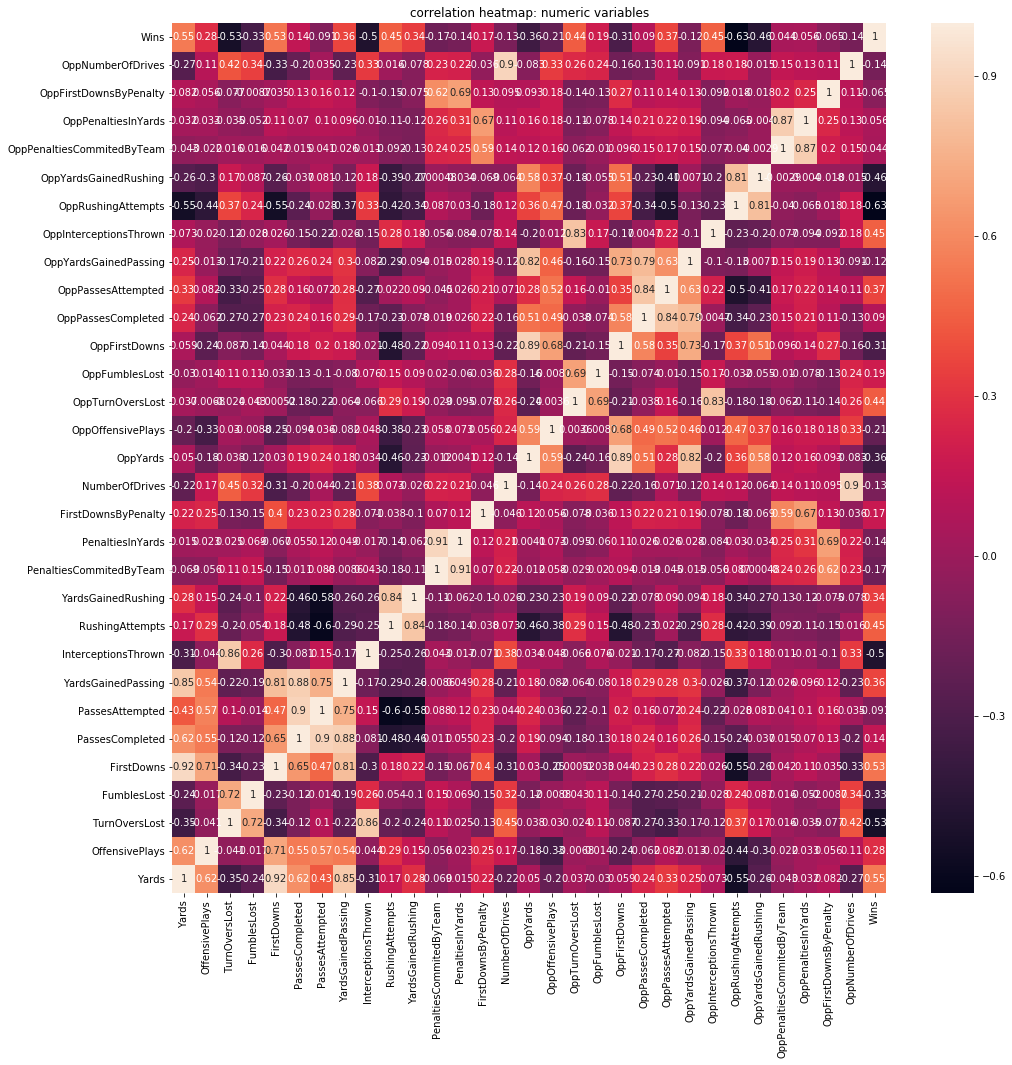

In [9]:
plt.figure(figsize=(16,16))
sns.heatmap(train.corr(), annot = True)
plt.xlim([0, n])
plt.ylim([0, n])
plt.title("correlation heatmap: numeric variables")
plt.show()

In [10]:
indices = []
for i in range(n-1):
    if (abs(train.corr().iloc[:, n-1]) > 0.35)[i]:
        indices.append(i)

## Tree-Based Methods

Suppose that we want to predict the variable `Wins` of each team based on the predictors in the dataframe.

We can choose to use the entire dataset as the testing set, but we then cannot have a measure of how good predictions the model can make on future/unseen data.

Therefore, to enhance the predictive ability of the model, we split the dataset into a **training set** and a **testing set**:

- training set: used to build the model (i.e., obtain the coefficients of the model)
- testing set: used to test how good the model is (i.e., to test if the model is overfitting data observed)

In [11]:
# import the train_test_split() function from sklearn
from sklearn.model_selection import train_test_split

In [12]:
X = train.iloc[:, range(0, n-1)]
y = train.iloc[:, n-1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print("size of the training set is %d, size of the testing set is %d." %(X_train.shape[0], X_test.shape[0]))

size of the training set is 266, size of the testing set is 114.


In [14]:
# true test set
test_x = pd.read_csv("football_test.csv", index_col = 0)
test_y = pd.read_csv("football_answers.csv")
test_y = test_y.loc[:, "Wins"]

In [15]:
# standardize the features
n = test_x.shape[1]
for i in range(n - 1):
    test_x.iloc[:, i] = (test_x.iloc[:, i] - np.mean(test_x.iloc[:, i])) / np.std(test_x.iloc[:, i])

In [16]:
predictions = {}

In [17]:
def createTrees(model, train_x, train_y, test_x):
    '''
    This function takes in a model, fit it with the training set and 
    return the predicted values on the testing set.
    model: regression model built with selected parameters (not fitted 
           with data)
    train_x: training set of features
    train_y: training set of true outcome
    test_x:  testing set of the features
    return value: predictions - fitted values on the testing set
    '''
    model = model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    return predictions

### Regression Trees and Classification Trees

#### Regression Trees

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
predictions_tree = []
for i in range(4, len(indices) + 1):
    model_tree = DecisionTreeRegressor(max_depth = i)
    predictions_tree.append(createTrees(model_tree, X_train, y_train, test_x))
predictions["Regression Tree"] = predictions_tree

### Boosting-based Trees
- XGBoost model
- LightGBM model

#### XGBoost model

In [20]:
import xgboost as xgb

In [21]:
test_x.columns = X_train.columns

In [22]:
eta = list(np.arange(0.1, 1.6, 0.1))

In [23]:
predictions_xgb = []
for param in eta:
    xgb_model = xgb.XGBRegressor(objective = "reg:squarederror", max_iter = 10, seed = 7, 
                             max_depth = 2, learning_rate = param, n_estimators = 80)
    predictions_xgb.append(createTrees(xgb_model, X_train, y_train, test_x))
predictions["xgboost"] = predictions_xgb

#### Visualize the tree

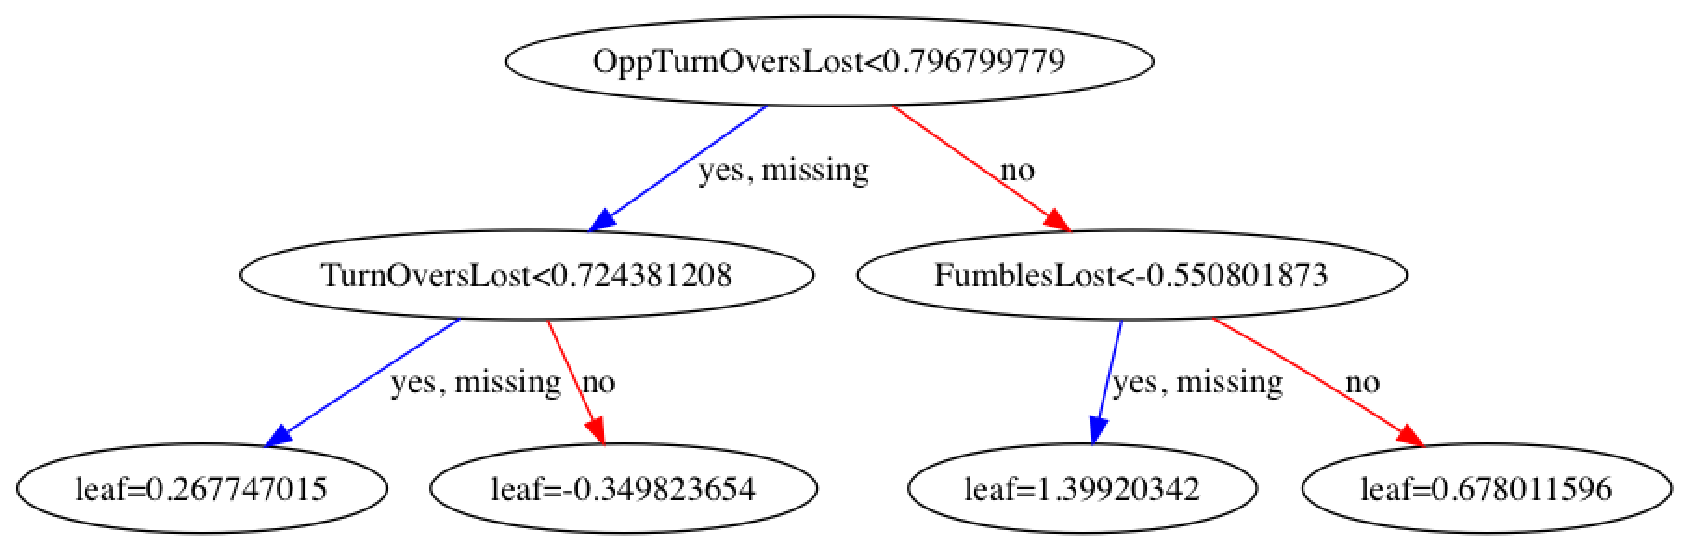

In [24]:
xgb_model = xgb.XGBRegressor(objective = "reg:squarederror", max_iter = 10, seed = 7, 
                             max_depth = 2, learning_rate = 0.5, n_estimators = 80)
model_xgb = xgb_model.fit(X_train, y_train)
fig, ax = plt.subplots(figsize = (30, 30))
xgb.plot_tree(model_xgb, num_trees = 4, ax = ax)
plt.show()

#### LightGBM model

In [25]:
import lightgbm as lgb

In [26]:
train_set = lgb.Dataset(X_train, label = y_train)
num_round = 10
features = list(np.arange(0.1, 1, 0.1))
predictions_lgb = []
for i in features:
    param = {'objective': 'regression', 'num_iterations' : 500, 'max_depth' : 3, 
         'learning_rate' : 0.8, 'max_bin': 100, 'feature_fraction': i,
         'bagging_freq': 20}
    param['metric'] = 'rmse'
    model_lgb = lgb.train(param, train_set, num_round)
    predictions_lgb.append(model_lgb.predict(test_x))

#### Visualize the tree

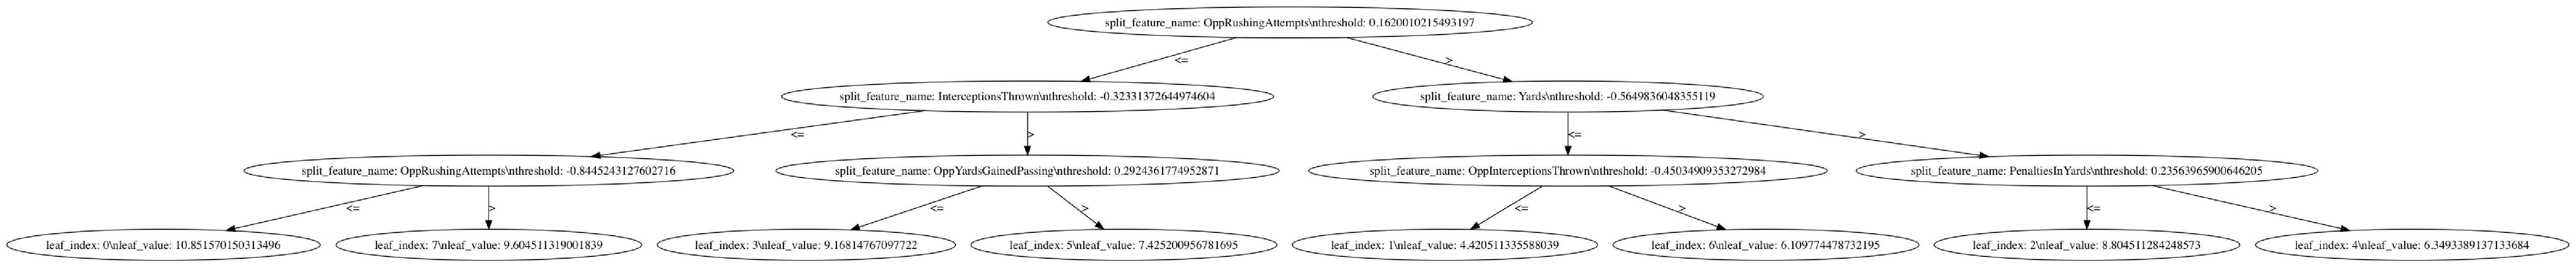

In [27]:
param = {'objective': 'regression', 'num_iterations' : 500, 'max_depth' : 3, 
         'learning_rate' : 0.8, 'max_bin': 100, 'feature_fraction': 0.5,
         'bagging_freq': 20}
param['metric'] = 'rmse'
model_lgb = lgb.train(param, train_set, num_round)
lgb.plot_tree(model_lgb, figsize = (100, 100))
plt.show()

In [28]:
predictions['LightGBM'] = predictions_lgb

### Bagging-based Trees
- Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
predictions_RF = []
for i in range(4, len(indices)):
    model_RF = RandomForestRegressor(max_depth = 2, random_state = 0, max_features = i)
    predictions_RF.append(createTrees(model_RF, X_train, y_train, test_x))
predictions["Random Forest"] = predictions_RF

### Comparison of the trees

#### Calculate the average value of the predictions in each type of tree

In [31]:
averages = {key:np.mean(predictions[key], axis = 0) for key in predictions.keys()}

#### Calculate the average amount of variance in each type of tree

In [32]:
variances = {key:np.var(predictions[key]) for key in predictions.keys()}

#### Calculate the average amount of bias in each type of tree

In [33]:
biases = {key:np.mean(np.abs(value - test_y)) for key, value in averages.items()}

#### Plot average predictions vs. true values

In [34]:
colors = {1:"blue", 2:"red", 3:"orange", 4:"pink"}

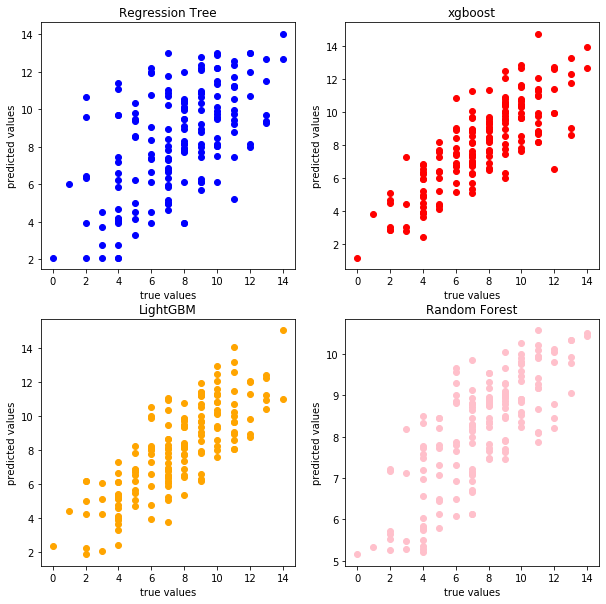

In [35]:
plt.figure(figsize = (10, 10))
i = 1
for key, value in averages.items():
    plt.subplot(2, 2, i)
    plt.scatter(test_y, value, color = colors[i])
    plt.xlabel("true values")
    plt.ylabel("predicted values")
    plt.title(key)
    i += 1

#### Change in bias

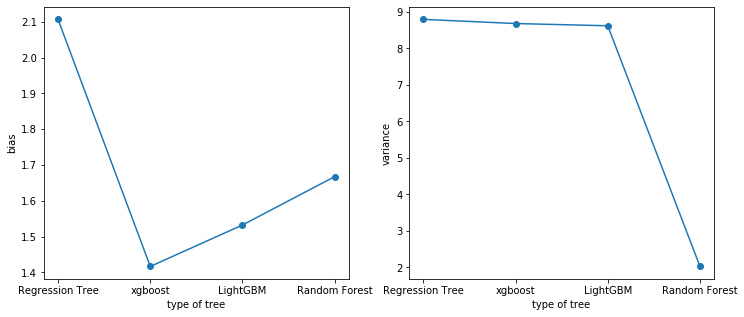

In [36]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.plot(list(biases.keys()), list(biases.values()), "-o")
plt.xlabel("type of tree")
plt.ylabel("bias")
plt.subplot(1, 2, 2)
plt.plot(list(variances.keys()), list(variances.values()), "-o")
plt.xlabel("type of tree")
plt.ylabel("variance")
plt.show()

#### Bias vs. Variance

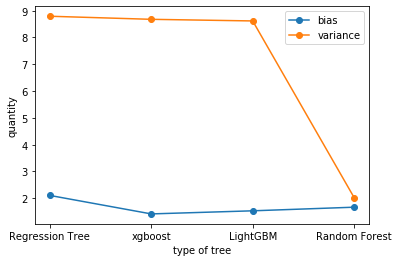

In [37]:
plt.plot(list(biases.keys()), list(biases.values()), "-o")
plt.plot(list(variances.keys()), list(variances.values()), "-o")
plt.xlabel("type of tree")
plt.ylabel("quantity")
plt.legend(["bias", "variance"])

Upcoming module:

### Evaluation Criteria

- MSE and RMSE
- $R^2$ and $R^2_{\text{adj}}$
- AIC, BIC and $C_p$

**&copy; Kaixin Wang**, updated February 2020